In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
class angle:
    def __init__(self, angle, min, sec):
        self.angle = angle
        self.min = min
        self.sec = sec
    
    def get_degree(self):
        return self.angle + self.min / 60 + self.sec / 3600

    def __str__(self) -> str:
        return f"${self.angle}^{{\\circ}}{self.min}'{self.sec}''$"

In [79]:
data = np.array([
    ["фиолетовый",  404.7, angle(13, 36, 28)],
    ["синий",       435.8, angle(14, 26, 28)],
    ["голубой",     491.6, angle(16, 8, 32)],
    ["зеленый",     546.1, angle(17, 45, 27)],
    ["желтый",      577.0, angle(18, 40, 21)],
    ["желтый",      579.1, angle(18, 44, 21)],

])

In [80]:
print('''
\\begin{table}[h]
\\centering
\\begin{tabular}{|c|c|c|c|}
\\hline ''')

print("Цвет & Длина волны, нм. & угол $\\phi_1$, град. & $sin(\\phi_1)$ \\ \hline")
for line in data:
    color_name, wave_len, angle = line
    print(f"{color_name} & {wave_len} & {angle} & {np.sin(np.deg2rad(angle.get_degree())):.5f} \\\ \\hline")

print('''
\end{tabular}
\caption{Данные эксперимента}
\label{tabl:expr}
\end{table}
''')


\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline 
Цвет & Длина волны, нм. & угол $\phi_1$, град. & $sin(\phi_1)$ \ \hline
фиолетовый & 404.7 & $13^{\circ}36'28''$ & 0.23527 \\ \hline
синий & 435.8 & $14^{\circ}26'28''$ & 0.24938 \\ \hline
голубой & 491.6 & $16^{\circ}8'32''$ & 0.27802 \\ \hline
зеленый & 546.1 & $17^{\circ}45'27''$ & 0.30499 \\ \hline
желтый & 577.0 & $18^{\circ}40'21''$ & 0.32016 \\ \hline
желтый & 579.1 & $18^{\circ}44'21''$ & 0.32126 \\ \hline

\end{tabular}
\caption{Данные эксперимента}
\label{tabl:expr}
\end{table}



In [121]:
lambdas = []
sin_angles = []

for line in data:
    color_name, wave_len, angle = line
    sin_phi = np.sin(np.deg2rad(angle.get_degree()))
    lambdas.append(wave_len)
    sin_angles.append(sin_phi)

lambdas = np.array(lambdas) / 10 ** (9)
sin_angles = np.array(sin_angles)

In [122]:
sin_angles

array([0.23527405, 0.2493848 , 0.27802259, 0.30498896, 0.32015833,
       0.32126042])

In [123]:
lambdas

array([4.047e-07, 4.358e-07, 4.916e-07, 5.461e-07, 5.770e-07, 5.791e-07])

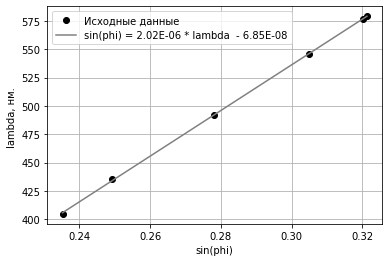

In [133]:
# Оценка коэффициентов методом наименьших квадратов
a, b = np.polyfit(sin_angles, lambdas, 1)


# Вычисление точек для построения графика
min_x = np.min(sin_angles)
max_x = np.max(sin_angles)
x = np.linspace(min_x, max_x, 100)
y = a * x + b

# Построение графика
plt.plot(sin_angles, lambdas * 10**9, 'o', color="black", label='Исходные данные')
plt.plot(x, y * 10**9, '-', color="gray", label=f'sin(phi) = {a:.2E} * lambda  {"+" if b > 0 else "-"} {abs(b):.2E}')

plt.ylabel('lambda, нм. ')
plt.xlabel('sin(phi)')
plt.legend()
plt.grid()
plt.savefig("sin_to_lambda.png")
plt.show()

In [134]:
a * 10**(6)

2.0156958487356356

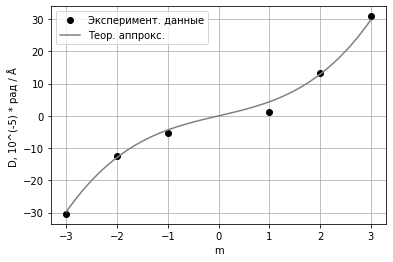

In [150]:
ms = np.array([1, 2, 3, -1, -2, -3])
D_exp = np.array([1.14, 13.4, 30.9, -5.46, -12.5, -30.4])
D_true = np.array([5.22, 12.2, 29.9, -5.22, -12.2, -29.9])

a, b, c, d = np.polyfit(ms, D_true, 3)
min_x = np.min(ms)
max_x = np.max(ms)
x = np.linspace(min_x, max_x, 100)
y = a * x**3  + b*x**2 + c*x + d

plt.plot(ms, D_exp, 'o', color="black", label="Эксперимент. данные")
plt.plot(x, y, '-', color="gray", label="Теор. аппрокс.")

plt.ylabel('D, 10^(-5) * рад / Å ')
plt.xlabel('m')

plt.grid()
plt.legend()
plt.savefig("d_to_m.png")

# plt.show()